In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import plotting_utils as pu
import overview_plot_utils as opu

In [2]:
# Set fonts
from matplotlib import font_manager
font_dirs = ["/storage/home/dcl5300/fonts"]

font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 12
plt.rcParams["font.sans-serif"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["axes.linewidth"] = 1.5

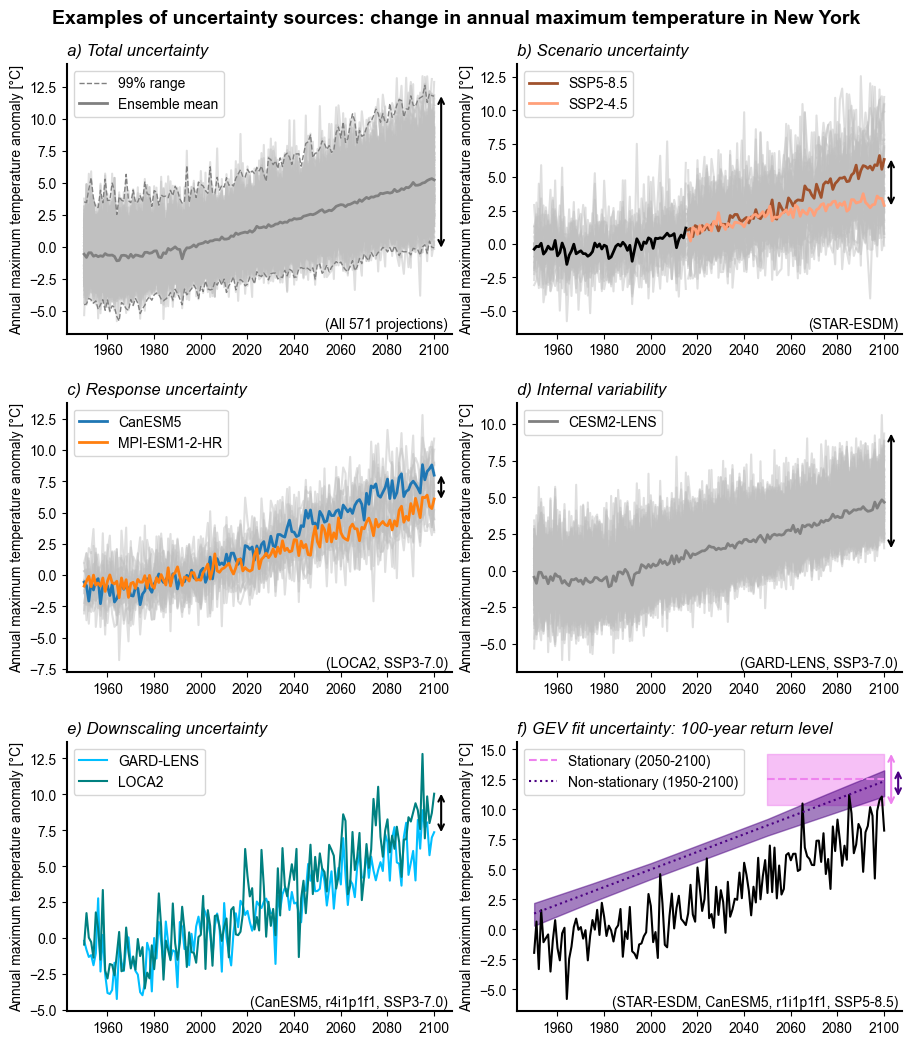

In [3]:
##########################
# FIGURE 1
##########################
opu.make_figure(city='nyc', metric_id='max_tasmax')

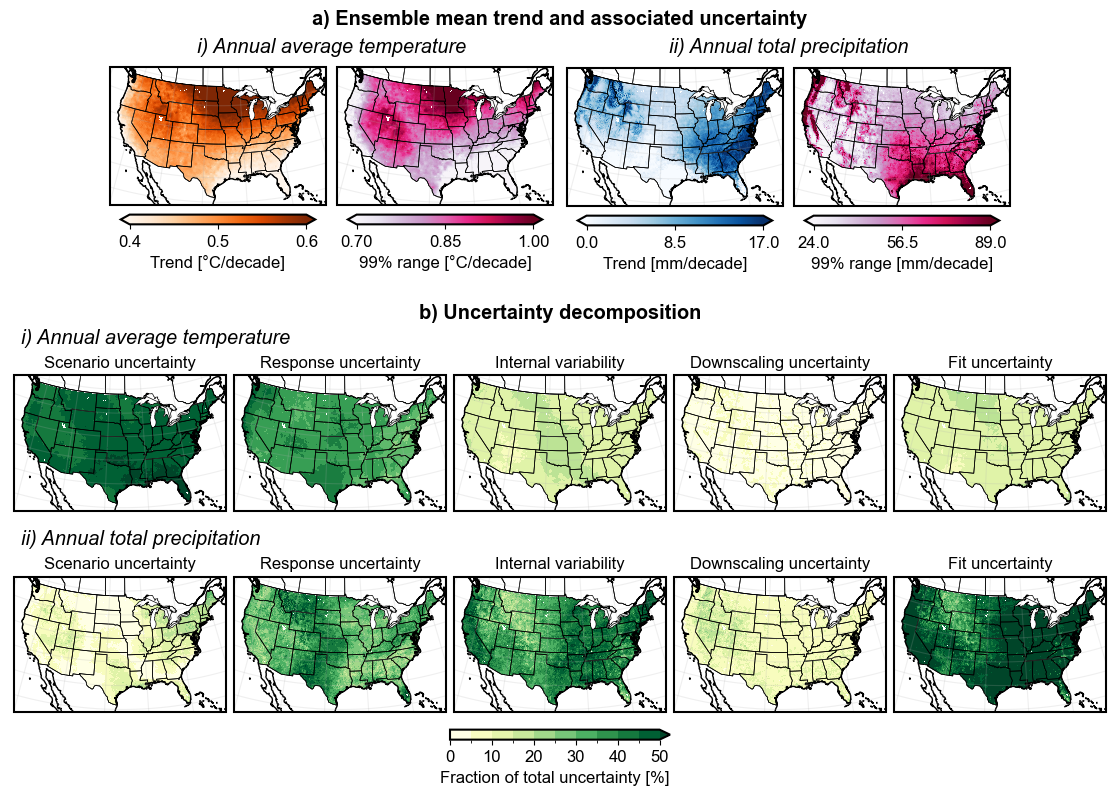

In [6]:
##########################
# FIGURE 2
##########################
pu.plot_ensemble_mean_uq(
    figsize=(11,7),
    plot_metric_ids=['avg_tas', 'sum_pr'],
    plot_col = 'slope',
    analysis_type = 'trends',
    summary_title = 'a) Ensemble mean trend and associated uncertainty',
    proj_slice = '2015-2100',
    x_title=0.01,
    a_y_titles=1.03,
    a_y_title=1.15,
)

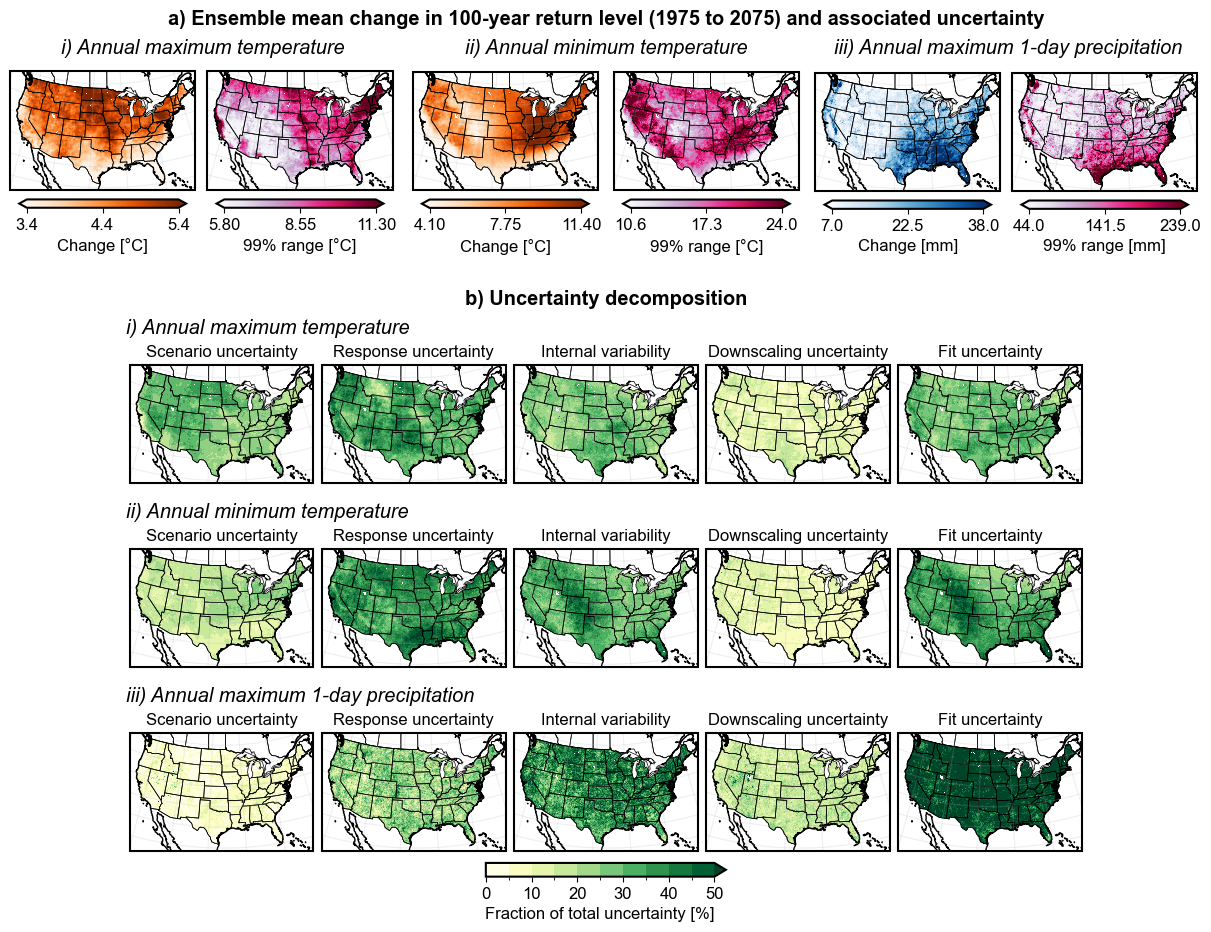

In [7]:
######################
# FIGURE 3
######################
pu.plot_ensemble_mean_uq(
    figsize=(12,8.5),
    plot_metric_ids=['max_tasmax', 'min_tasmin', 'max_pr'],
    plot_col='100yr_return_level',
    analysis_type='extreme_value',
    summary_title="a) Ensemble mean change in 100-year return level (1975 to 2075) and associated uncertainty",
    time_str = 'diff_2075-1975',
    height_ratios = [1.23,3],
    x_title=0.1,
    a_y_title=1.1,
    a_y_titles=0.97,
    b_y_title=1.08,
    b_y_titles=1.08,
    hspace=0.18,
)

In [27]:
import importlib
importlib.reload(pu)

<module 'plotting_utils' from '/storage/work/dcl5300/current_projects/conus_comparison_lafferty-etal-2024/src/plotting_utils.py'>

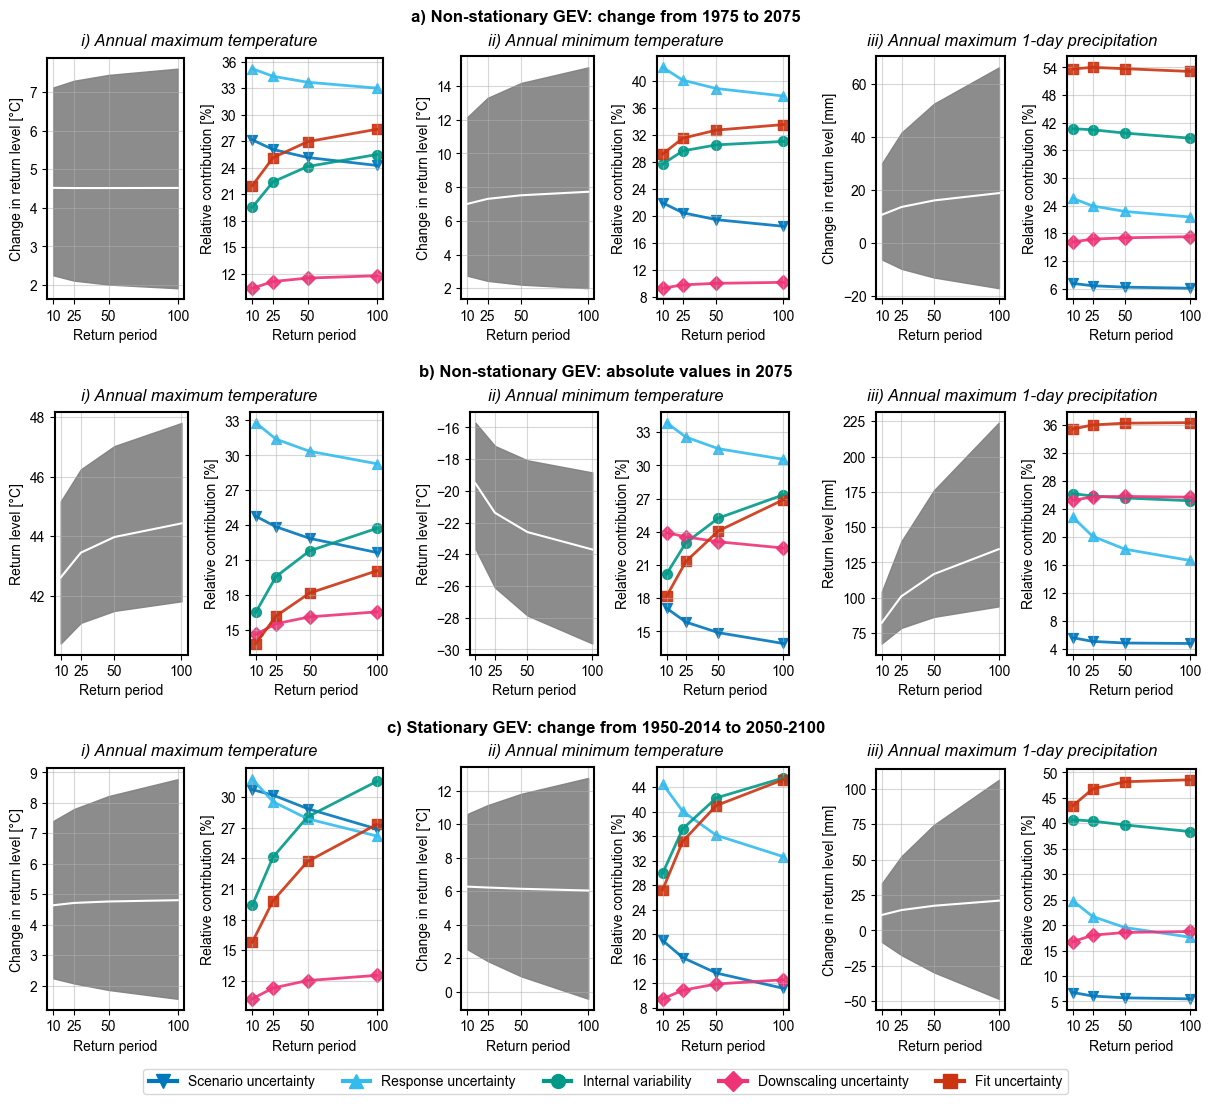

In [28]:
##################
# FIGURE 4
##################
plt.rcParams["font.size"] = 10

fig = plt.figure(figsize=(12, 11), layout='constrained')
subfigs = fig.subfigures(4, 1, hspace=0.05, height_ratios=[1, 1, 1, 0.1])
metric_ids = ['max_tasmax', 'min_tasmin', 'max_pr']

######### Nonstat change
subfigs[0].suptitle('a) Non-stationary GEV: change from 1975 to 2075', fontweight='bold')
subfigs_row0 = subfigs[0].subfigures(1, 3, wspace=0.05)
for idm, metric_id in enumerate(metric_ids):
    subfigs_row0[idm].suptitle(f"{pu.subplot_labels[idm]} {pu.title_labels[metric_id]}", fontstyle="italic")
    axs0 = subfigs_row0[idm].subplots(1, 2, sharex=True)
    
    # Response
    pu.plot_response_rls(
        coord_or_mean="mean",
        proj_slice="1950-2100",
        hist_slice=None,
        fit_method="mle",
        stat_str="nonstat_scale",
        metric_ids=[metric_id],
        axs=axs0[0],
        idm_start=idm,
        legend=False,
        time_str='diff_2075-1975',
        ax_title=False,
        xlabel=True,
        xticklabels=True
    )
    
    # UC
    pu.plot_uc_rls(
        coord_or_mean="mean",
        proj_slice="1950-2100",
        hist_slice=None,
        fit_method="mle",
        stat_str="nonstat_scale",
        metric_ids=[metric_id],
        axs=axs0[1],
        legend=False,
        time_str='diff_2075-1975',
        ax_title=False,
        xlabel=True,
        xticklabels=True
    )

######### Nonstat abs
subfigs[1].suptitle('b) Non-stationary GEV: absolute values in 2075', fontweight='bold')
subfigs_row1 = subfigs[1].subfigures(1, 3, wspace=0.05)
for idm, metric_id in enumerate(metric_ids):
    subfigs_row1[idm].suptitle(f"{pu.subplot_labels[idm]} {pu.title_labels[metric_id]}", fontstyle="italic")
    axs1 = subfigs_row1[idm].subplots(1, 2, sharex=True)
    
    # Response
    pu.plot_response_rls(
        coord_or_mean="mean",
        proj_slice="1950-2100",
        hist_slice=None,
        fit_method="mle",
        stat_str="nonstat_scale",
        metric_ids=[metric_id],
        axs=axs1[0],
        idm_start=idm,
        legend=False,
        time_str='2075',
        ax_title=False,
        xlabel=True,
        xticklabels=True
    )
    
    # UC
    pu.plot_uc_rls(
        coord_or_mean="mean",
        proj_slice="1950-2100",
        hist_slice=None,
        fit_method="mle",
        stat_str="nonstat_scale",
        metric_ids=[metric_id],
        axs=axs1[1],
        legend=False,
        time_str='2075',
        ax_title=False,
        xlabel=True,
        xticklabels=True
    )

######### Stat change
subfigs[2].suptitle('c) Stationary GEV: change from 1950-2014 to 2050-2100', fontweight='bold')
subfigs_row2 = subfigs[2].subfigures(1, 3, wspace=0.05)
for idm, metric_id in enumerate(metric_ids):
    subfigs_row2[idm].suptitle(f"{pu.subplot_labels[idm]} {pu.title_labels[metric_id]}", fontstyle="italic")
    axs2 = subfigs_row2[idm].subplots(1, 2, sharex=True)
    
    # Response
    pu.plot_response_rls(
        coord_or_mean="mean",
        proj_slice="2050-2100",
        hist_slice="1950-2014",
        fit_method="lmom",
        stat_str="stat",
        metric_ids=[metric_id],
        axs=axs2[0],
        idm_start=idm,
        legend=False,
        time_str='diff',
        ax_title=False,
    )
    
    # UC
    legend_elements = pu.plot_uc_rls(
        coord_or_mean="mean",
        proj_slice="2050-2100",
        hist_slice="1950-2014",
        fit_method="lmom",
        stat_str="stat",
        metric_ids=[metric_id],
        axs=axs2[1],
        legend=False,
        time_str='diff',
        ax_title=False,
        return_legend=True
    )

######### Legend
ax_legend = subfigs[3].subplots(1, 1)
ax_legend.axis('off')
ax_legend.legend(handles=legend_elements, loc="lower center", ncol=5)#, borderaxespad=0.25)

plt.show()